<a href="https://colab.research.google.com/github/IvanEFibiger/BDyML/blob/main/FINAL_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Fake News


## Importar librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier


## Importar dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_fake=pd.read_csv('/content/drive/MyDrive/FINAL ML/Fake.csv')
data_true=pd.read_csv('/content/drive/MyDrive/FINAL ML/True.csv')

Visualización previa


In [ ]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Preprocesamiento de datos


In [ ]:
data_fake["class"]=0
data_true['class']=1

In [ ]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [ ]:
# Eliminación de filas para prueba manual
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)


data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)

In [ ]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [ ]:
# Asignación de etiquetas de clase
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

<ipython-input-39-350d73592787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
<ipython-input-39-350d73592787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [ ]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
# Concatenación de conjuntos de datos
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


## Eliminar columnas irrelevantes

In [ ]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [ ]:

data.isnull().sum()

text     0
class    0
dtype: int64

## Aleatorizar y reorganizar el conjunto de datos

In [ ]:
data = data.sample(frac = 1)

In [ ]:
data.head()

,text,class
15839,ZAGREB (Reuters) - Croatia s opposition partie...,1
1629,It is no secret that President Donald Trump li...,0
20022,International leaders aren t making any secret...,0
11664,Michael Flynn resigned as President Donald Tru...,0
20560,This is a story you won t likely find anywhere...,0


In [ ]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [ ]:
data.head()

,text,class
0,ZAGREB (Reuters) - Croatia s opposition partie...,1
1,It is no secret that President Donald Trump li...,0
2,International leaders aren t making any secret...,0
3,Michael Flynn resigned as President Donald Tru...,0
4,This is a story you won t likely find anywhere...,0


## Preprocesar Texto

In [ ]:
def cleanText(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [ ]:
data['text'] = data['text'].apply(cleanText)

#**LOGISTIC REGRESSION**

## División de datos

In [ ]:
x = data['text']
y = data['class']

## Entrenamiento del Modelo

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

## Evaluación del Modelo


In [ ]:
pred_lr = LR.predict(xv_test)

In [ ]:
accuracy_lr = LR.score(xv_test, y_test)
print("Accuracy del modelo de regresión logística:", accuracy_lr)

Accuracy del modelo de regresión logística: 0.9864527629233512


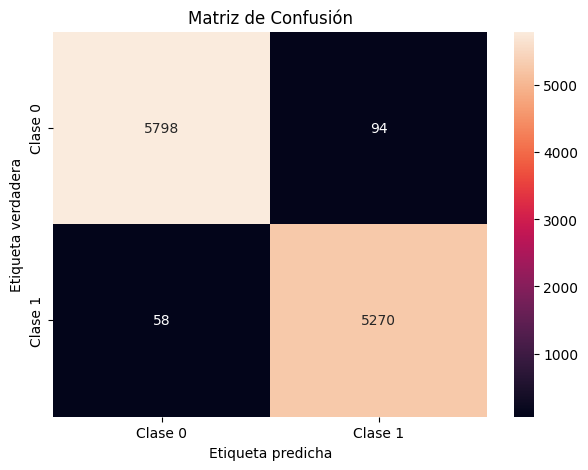

In [ ]:
c = confusion_matrix(y_test, pred_lr)

# Visualizar la matriz de confusión
plt.figure(figsize=(7, 5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
cv_scores = cross_val_score(LR, xv_train, y_train, cv=10)
print("Scores de validación cruzada:", cv_scores)
print("Media de los scores:", cv_scores.mean())
print("Desviación estándar de los scores:", cv_scores.std())

Scores de validación cruzada: [0.9845514  0.98276887 0.98930481 0.98247178 0.98395722 0.98603684
 0.98603684 0.98633393 0.9872214  0.98454681]
Media de los scores: 0.985322987765956
Desviación estándar de los scores: 0.0019803064799553544


In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
cv_scores_kfold = cross_val_score(LR, xv_train, y_train, cv=cv)
print("Scores de validación cruzada KFold:", cv_scores_kfold)
print("Media de los scores KFold:", cv_scores_kfold.mean())
print("Desviación estándar de los scores KFold:", cv_scores_kfold.std())

Scores de validación cruzada KFold: [0.98677956 0.98544266 0.98262032 0.98142921 0.98752043]
Media de los scores KFold: 0.9847584358180633
Desviación estándar de los scores KFold: 0.0023595339443749745


## Métricas de Desempeño

In [ ]:
precision_lr = precision_score(y_test, pred_lr)
recall_lr = recall_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr)
accuracy_lr = accuracy_score(y_test, pred_lr)
print("Métricas del modelo de regresión logística:")
print("Precisión:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
print("Exactitud:", accuracy_lr)

Métricas del modelo de regresión logística:
Precisión: 0.982475764354959
Recall: 0.9891141141141141
F1-score: 0.9857837635615413
Exactitud: 0.9864527629233512


# **RANDOM FOREST**

## Crear y ajustar el modelo

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(xv_train, y_train)


RandomForestClassifier()

## Realizar predicciones

In [ ]:
y_pred_rf = rf_model.predict(xv_test)

## Matriz de confusión

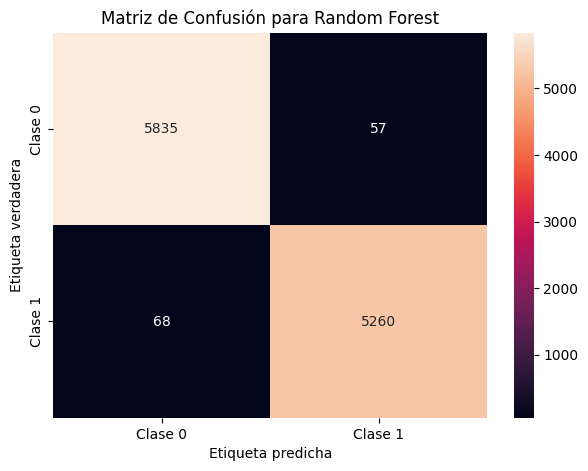

In [ ]:
c_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(7, 5))
sns.heatmap(c_rf, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión para Random Forest')
plt.show()

## Validación cruzada

In [ ]:
cv_scores_rf = cross_val_score(rf_model, xv_train, y_train, cv=5)
print("Scores de validación cruzada (Random Forest):", cv_scores_rf)
print("Media de los scores:", cv_scores_rf.mean())
print("Desviación estándar de los scores:", cv_scores_rf.std())

Scores de validación cruzada (Random Forest): [0.99019608 0.98841355 0.988265   0.98425197 0.98752043]
Media de los scores: 0.9877294050028633
Desviación estándar de los scores: 0.0019481082941451347


## Métricas de desempeño

In [ ]:
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Imprimir métricas del modelo Random Forest
print("Métricas del modelo Random Forest:")
print("Precisión:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("Exactitud:", accuracy_rf)

Métricas del modelo Random Forest:
Precisión: 0.9892796689862704
Recall: 0.9872372372372372
F1-score: 0.9882573978393612
Exactitud: 0.9888591800356507


# **ENSAMBLE**

## Crear y ajustar el modelo

In [ ]:
voting_classifier = VotingClassifier(estimators=[
    ('LR', LogisticRegression()),
    ('random_forest', RandomForestClassifier())
], voting='hard')


In [ ]:
voting_classifier.fit(xv_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('random_forest', RandomForestClassifier())])

## Realizar predicciones

In [ ]:
y_pred_ensemble = voting_classifier.predict(xv_test)

## Matriz de confusión

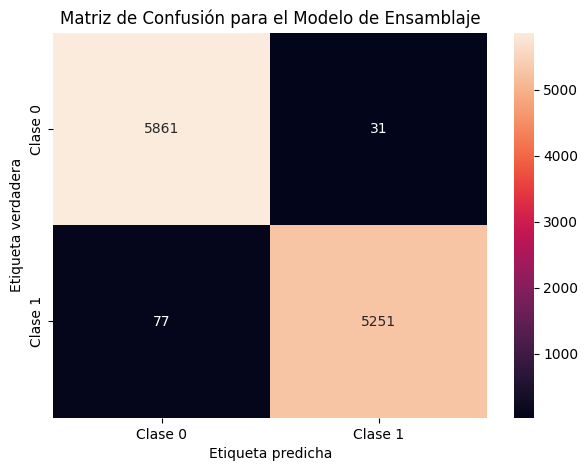

In [ ]:
c_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Visualizar la matriz de confusión para el modelo de ensamblaje
plt.figure(figsize=(7, 5))
sns.heatmap(c_ensemble, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión para el Modelo de Ensamblaje')
plt.show()

## Validación cruzada

In [ ]:
cv_scores_ensemble = cross_val_score(voting_classifier, xv_train, y_train, cv=5)
print("Scores de validación cruzada (Ensamble):", cv_scores_ensemble)
print("Media de los scores:", cv_scores_ensemble.mean())
print("Desviación estándar de los scores:", cv_scores_ensemble.std())

Scores de validación cruzada (Ensamble): [0.98752228 0.988265   0.98588829 0.9854405  0.98707473]
Media de los scores: 0.9868381614743924
Desviación estándar de los scores: 0.001040727431724627


In [ ]:
# Imprimir métricas del modelo de ensamblaje
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

print("Métricas del modelo de ensamblaje:")
print("Precisión:", precision_ensemble)
print("Recall:", recall_ensemble)
print("F1-score:", f1_ensemble)
print("Exactitud:", accuracy_ensemble)

Métricas del modelo de ensamblaje:
Precisión: 0.9941310109806891
Recall: 0.9855480480480481
F1-score: 0.9898209236569275
Exactitud: 0.9903743315508021


# **Pruebas Manuales y Resultados**

In [ ]:
def output_label(n):
    if n == 0:
        return "Es Fake News"
    elif n == 1:
        return "No es una Fake News"

def manual_testing(news):
    # Crear un diccionario con la noticia de prueba
    testing_news = {"text": [news]}

    # Crear un DataFrame con la noticia de prueba
    new_def_test = pd.DataFrame(testing_news)

    # Aplicar la limpieza de texto a la noticia de prueba
    new_def_test['text'] = new_def_test["text"].apply(cleanText)

    # Obtener el texto de la noticia de prueba
    new_x_test = new_def_test["text"]

    # Transformar el texto de la noticia de prueba usando el vectorizador
    new_xv_test = vectorization.transform(new_x_test)

    # Realizar predicciones con los modelos
    pred_LR = LR.predict(new_xv_test)
    pred_RF = rf_model.predict(new_xv_test)
    pred_E = voting_classifier.predict(new_xv_test)

    # Imprimir las predicciones
    print("\n\nLR Prediction: {} \nRF Prediction: {} \nEnsemble Prediction: {}".format(
        output_label(pred_LR[0]), output_label(pred_RF[0]), output_label(pred_E[0])))



In [ ]:
# Solicitar la entrada del usuario para una noticia
noticia = str(input())
manual_testing(noticia)

Dec 28 (Reuters) - Argentine President Javier Milei has sent a reform bill to Congress proposing far-reaching changes to the country's tax system, electoral law and public debt management.  The push to reshape South America's second-largest economy with an omnibus bill requires approval from lawmakers in both chambers of Congress, where Milei's coalition holds a small minority of seats.  WHAT ARE THE MAJOR REFORMS IN THE BILL? The bill has 664 articles that range from allowing the privatization of 41 public companies, eliminating the presidential primary vote and introducing a broad 15% tax on most exports.


LR Prediction: No es una Fake News 
RF Prediction: No es una Fake News 
Ensemble Prediction: No es una Fake News


In [ ]:
noticia = str(input())
manual_testing(noticia)

Dec 28 (Reuters) - In a shocking turn of events, Argentina finds itself grappling with the aftermath of a missile incident that has raised concerns both domestically and internationally. The nation, known for its rich cultural heritage and breathtaking landscapes, now faces the daunting task of addressing the fallout caused by the recent missile strike.


LR Prediction: Es Fake News 
RF Prediction: No es una Fake News 
Ensemble Prediction: Es Fake News


In [ ]:
noticia = str(input())
manual_testing(noticia)

The match, filled with adrenaline and excitement, showcased the true spirit of Argentine football. River Plate secured a convincing 3-1 win, with goals from their star players Franco Armani, Federico Colidio, and Ramiro Funes Mori. From the first whistle, both teams demonstrated their unwavering determination to claim South America's most prestigious club trophy.


LR Prediction: Es Fake News 
RF Prediction: Es Fake News 
Ensemble Prediction: Es Fake News
